# Zadanie 1

Write infinite random discrete values generator (integer number from given range, python generators, yield) and visualize how probability of given numbers change in time (matplotlib animation)

In [1]:
import random

def generate_random_integer(r_min, r_max):
      while True:
            yield random.randint(r_min, r_max)

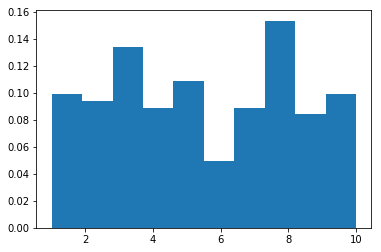

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

int_generator = generate_random_integer(1, 10)

drawn_numbers = []
fig, ax = plt.subplots()

def animate(i, data, generator):
    data.append(next(generator))
    weights = np.ones_like(data) / len(data)
   
    ax.clear()
    ax.hist(data, weights=weights, bins=10)
    
anim = animation.FuncAnimation(fig, animate, frames=200, interval=50, fargs=(drawn_numbers, int_generator))
HTML(anim.to_html5_video())

# Zadanie 2

Using generator from previous task, visualize probability of occurrence for two consecutive numbers (all possible pairs) in the stream (matplotlib animation, heatmaps)

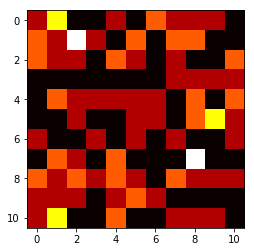

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

HIGH_R = 10
int_generator = generate_random_integer(0, HIGH_R)

occurences = np.zeros((HIGH_R + 1, HIGH_R + 1))
previous = next(int_generator)

fig, ax = plt.subplots()

def animate(i, generator, occurences):
    global previous
    next_num = next(generator)
    
    occurences[previous][next_num] += 1
    probabilities = occurences / (i + 1) # jawnie obliczone prawdopodobieństwo (wystarczyłoby przakazać 'occurences')
    
    previous = next_num
    
    ax.clear()
    ax.imshow(probabilities, cmap='hot', interpolation='nearest')
    
anim = animation.FuncAnimation(fig, animate, frames=100, interval=50, 
                               fargs=(int_generator, occurences))
HTML(anim.to_html5_video())

# Zadanie 3

Write a simulator for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

### Oznaczenia:

$X$ - chory

$X'$ - zdrowy

$A$ - test pozytywny

$A'$ - test negatywny

### Wzory:

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

$P(X) = 1 - P(X')$

### Dane:

$P(A|X') = 0.02$

$P(A'|X) = 0.01$

$P(X) = \frac{<1; 100>}{50 000}$

### Szukane:

$P(X|A) = ?$

## Rozwiązanie:

Mamy do policzenia:

$P(X|A) = \frac{P(X \cap A)}{P(A)}$

Rozpisując ze wzoru na prawdopodobieństwo warunkowe:

$P(A|X') = \frac{P(A \cap X')}{P(X')} \Rightarrow P(A \cap X') = P(A|X') \cdot P(X') = 0.02 \cdot (1-P(X))$

$P(A'|X) = \frac{P(A' \cap X)}{P(X)} \Rightarrow P(A' \cap X) = P(A'|X) \cdot P(X) = 0.01 \cdot P(X)$

Otrzymujemy mianownik:

$P(X' \cap A) = P(A \cap X') = 0.02 \cdot (1-P(X))$

Z diagramów Venna można odczytać:

$P(A) = P(A \cap X') + P(A \cap X)$

Gdzie:

$P(A \cap X) = P(X) - P(A' \cap X) = P(X) - 0.01 \cdot P(X)$

Zatem:

$P(A) = P(A \cap X') + P(X) - P(A' \cap X) = 0.02 \cdot (1 - P(X)) + P(X) - 0.01 \cdot P(X) = 0.97 \cdot P(X) + 0.02$

Po podstawieniu do szukanego wzoru:

$P(X|A) = \frac{0.99 \cdot P(X)}{0.97 \cdot P(X) + 0.02}$

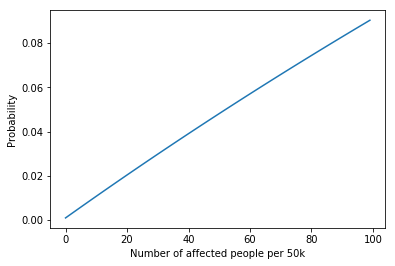

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def calculate_probability_of_being_ill_given_positive_test_result(number_of_ill_people):
    '''
        p_x - probability of being ill
    '''
    p_x = number_of_ill_people / 50000
    return (0.99 * p_x) / (0.97 * p_x + 0.02)

probs = [calculate_probability_of_being_ill_given_positive_test_result(i) for i in range(1,101)]

fig, ax = plt.subplots()

ax.set_xlabel('Number of affected people per 50k')
ax.set_ylabel('Probability')
ax.plot(probs)